####  과적합
####  노이즈
####  특성과 상관관계

In [3]:
import tensorflow as tf
import numpy as np

In [9]:
(x_train,y_train),(x_test,y_test) =  tf.keras.datasets.mnist.load_data()

In [10]:
# 스케일링
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

In [13]:
# 차수변경
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [28]:
# 잡음섞기
x_train_with_noise_channels =  np.concatenate([x_train, np.random.random( x_train.shape )],axis=1)
# 0픽셀을 추가
x_train_with_zero_channels =  np.concatenate([x_train, np.zeros( x_train.shape )],axis=1)

In [42]:
x_train_with_noise_channels.shape

(60000, 1568)

In [29]:
# 훈련

In [43]:
import tensorflow as tf
from tensorflow.keras import layers

In [47]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(512,activation='relu'),#,input_shape=(x_train_with_noise_channels.shape[1],)),
        layers.Dense(10,activation='softmax')
    ])
    model.compile(optimizer='adam', loss =tf.keras.losses.sparse_categorical_crossentropy,
                 metrics=['accuracy'])
    return model

In [48]:
model = build_model()
history_noise = model.fit(
    x_train_with_noise_channels,y_train,epochs=10,batch_size=128,validation_split=0.2        
)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.4485 - accuracy: 0.8648 - val_loss: 0.2674 - val_accuracy: 0.9235
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2343 - accuracy: 0.9312 - val_loss: 0.2003 - val_accuracy: 0.9399
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1550 - accuracy: 0.9539 - val_loss: 0.1641 - val_accuracy: 0.9521
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1110 - accuracy: 0.9664 - val_loss: 0.1622 - val_accuracy: 0.9525
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0815 - accuracy: 0.9767 - val_loss: 0.1314 - val_accuracy: 0.9599
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0600 - accuracy: 0.9830 - val_loss: 0.1344 - val_accuracy: 0.9617
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0409 - accuracy: 0.9887 - val_loss: 0.1291 - val_accuracy: 0.9619
Ep

In [49]:
model = build_model()
history_zeros = model.fit(
    x_train_with_zero_channels,y_train,epochs=10,batch_size=128,validation_split=0.2        
)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 0.2981 - accuracy: 0.9163 - val_loss: 0.1500 - val_accuracy: 0.9592
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1230 - accuracy: 0.9643 - val_loss: 0.1112 - val_accuracy: 0.9650
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0808 - accuracy: 0.9766 - val_loss: 0.0993 - val_accuracy: 0.9703
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0561 - accuracy: 0.9839 - val_loss: 0.0818 - val_accuracy: 0.9747
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0406 - accuracy: 0.9887 - val_loss: 0.0774 - val_accuracy: 0.9763
Epoch 6/10
375/375 [==============================] - 4s 9ms/step - loss: 0.0322 - accuracy: 0.9912 - val_loss: 0.0743 - val_accuracy: 0.9778
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0229 - accuracy: 0.9942 - val_loss: 0.0714 - val_accuracy: 0.9789
Epo

In [56]:
model = build_model()
# 섞어서
history = model.fit(
    x_train,y_train,epochs=10,batch_size=128,validation_split=0.2        
)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [50]:
# 검증의 정확도 비교
import matplotlib.pyplot as plt

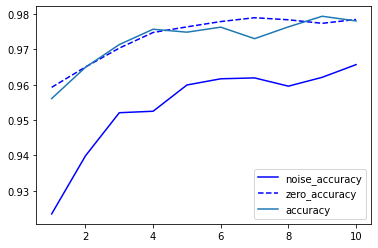

In [54]:
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
val_acc = history.history['val_accuracy']
epochs =range(1,11)
plt.plot(epochs,val_acc_noise,'b-',label='noise_accuracy')
plt.plot(epochs,val_acc_zeros,'b--',label='zero_accuracy')
plt.plot(epochs,val_acc,label='accuracy')
plt.legend()
plt.show()